In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SIR_python as SIR


import seaborn as sns
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

plt.rcParams['axes.grid'] = True
#plt.rcParams['axes.grid.axis'] = 'y'
#plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-v0_8')

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]


In [7]:
def error_max(data, data_05):
    ## skip first dimension
    dat = data[:,1:]
    dat_05 = data_05[::2,1:]
    err = np.abs(dat - dat_05)
    return np.max(err)

def error_time(data, data_05):
    dat = data[:,1:]
    dat_05 = data_05[::2,1:]
    err = np.abs(dat - dat_05)
    return np.max(err, axis=1)

S0 = 0.99
I0 = 0.01
R0 = 0.0
beta = 0.2
gamma = 0.1

dt_list = np.logspace(0, -6, num=10)
tmax = 200
ers = []

t_save = []
er_save = []

low_dt = dt_list[-1]
high_dt = dt_list[0]

for dt in dt_list:
    print(f"Running with dt = {dt:.2e}")
    num_steps = int(tmax/dt)
    return_every = 5
    data = SIR.integrate_system(S0, I0, R0, beta, gamma, dt, num_steps, return_every)
    data_05 = SIR.integrate_system(S0, I0, R0, beta, gamma, dt/2, num_steps*2, return_every)
    err = error_max(data, data_05)

    if dt == low_dt or dt == high_dt:
        t_save.append(data[:,0])
        er_save.append(error_time(data, data_05))
    ers.append(err)

Running with dt = 1.00e+00
Running with dt = 2.15e-01
Running with dt = 4.64e-02
Running with dt = 1.00e-02
Running with dt = 2.15e-03
Running with dt = 4.64e-04
Running with dt = 1.00e-04
Running with dt = 2.15e-05
Running with dt = 4.64e-06
Running with dt = 1.00e-06


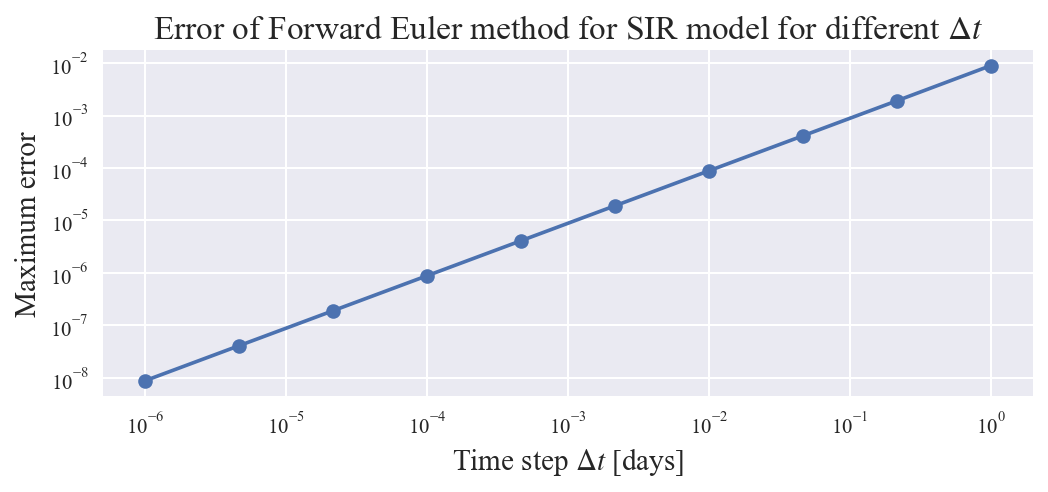

In [40]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)
ax.plot(dt_list, ers, marker='o', label='Error')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Time step $\Delta t$ [days]', fontsize=14)
ax.set_ylabel('Maximum error', fontsize=14)
ax.set_title(r'Error of Forward Euler method for SIR model for different $\Delta t$', fontsize=16);

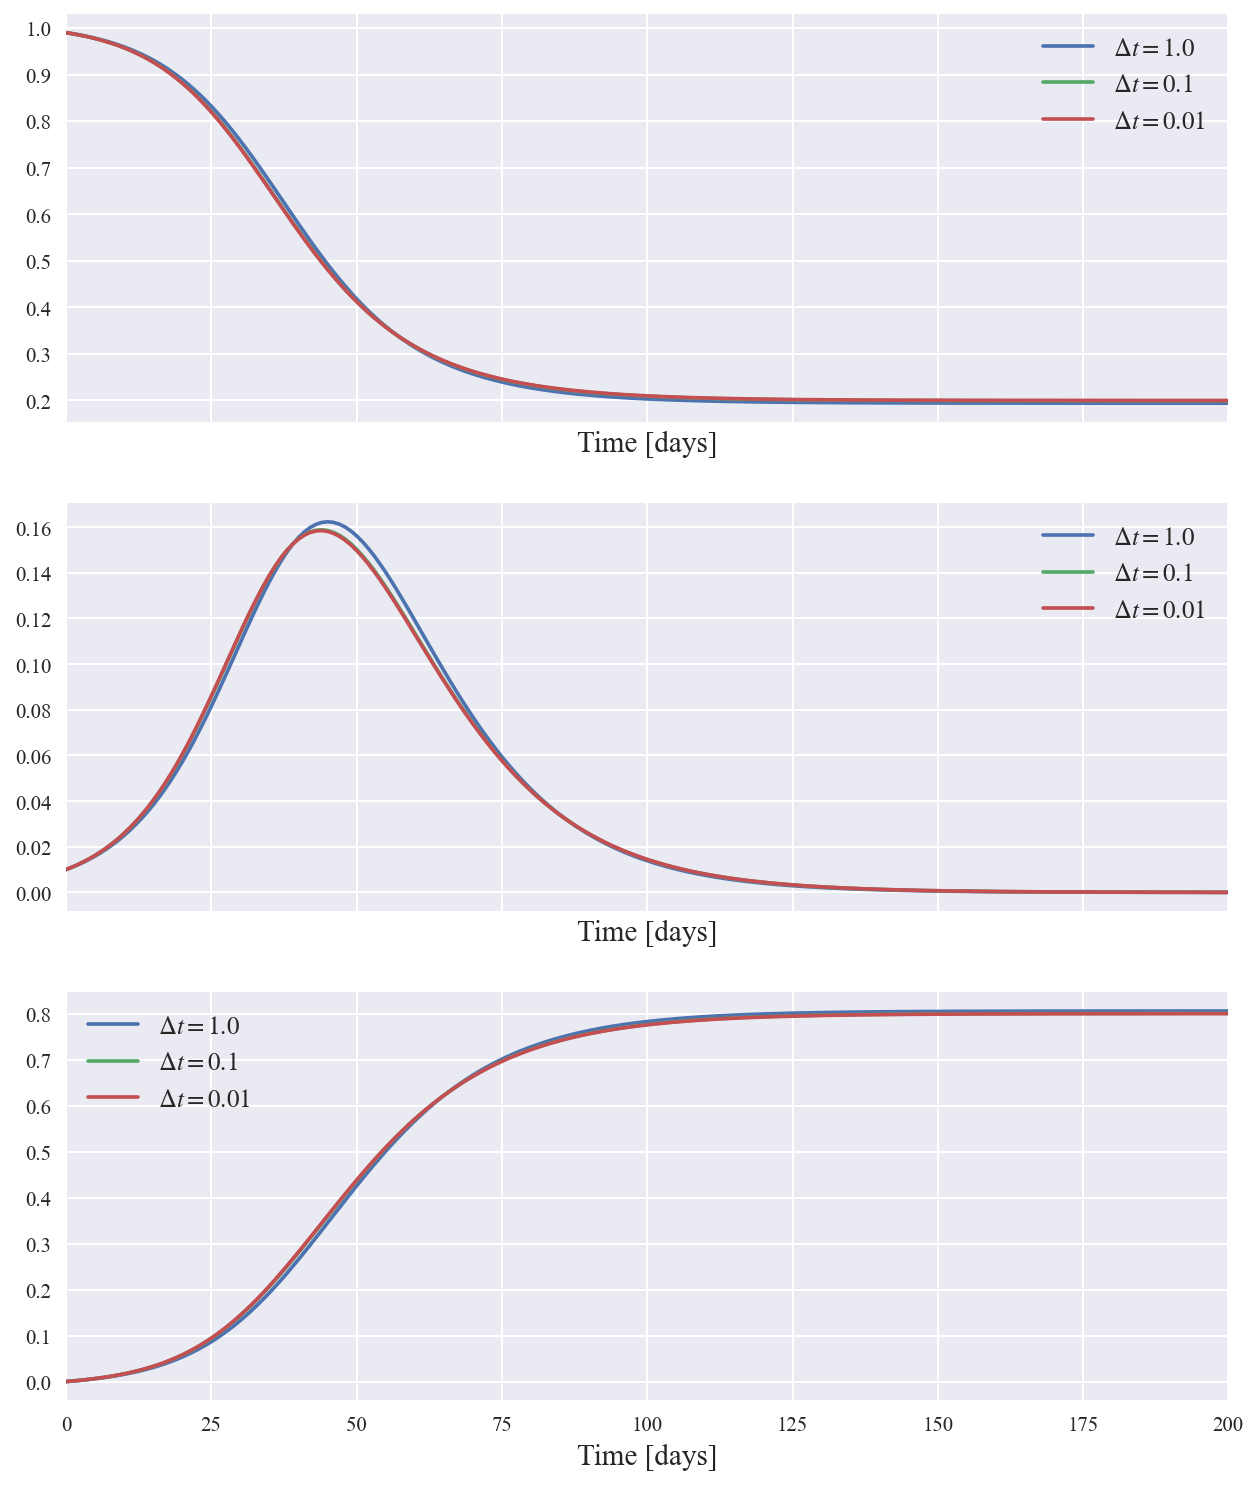

In [10]:
# Sanity check plot
fig, ax = plt.subplots(3,1, figsize=(10,12), sharex=True)
for i, dt in enumerate([1.0, 0.1, 0.01]):
    num_steps = int(tmax/dt)
    return_every = int(1/dt)
    data = SIR.integrate_system(S0, I0, R0, beta, gamma, dt, num_steps, return_every)
    time = data[:,0]
    S = data[:,1]
    I = data[:,2]
    R = data[:,3]
    
    ax[0].plot(time, S, label=r"$\Delta t = {}$".format(dt))
    ax[1].plot(time, I, label=r"$\Delta t = {}$".format(dt))
    ax[2].plot(time, R, label=r"$\Delta t = {}$".format(dt))

for axi in ax.flatten():
    axi.legend(fontsize=12)
    axi.set_xlabel("Time [days]", fontsize=14)
    axi.set_xlim(0,200)

/var/folders/jg/zx8gy3fd02qb_nm676xd6p6c0000gn/T/ipykernel_82012/3978351457.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/nielsaugustdavidsen/.local/share/mamba/envs/scicompenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/nielsaugustdavidsen/.local/share/mamba/envs/scicompenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


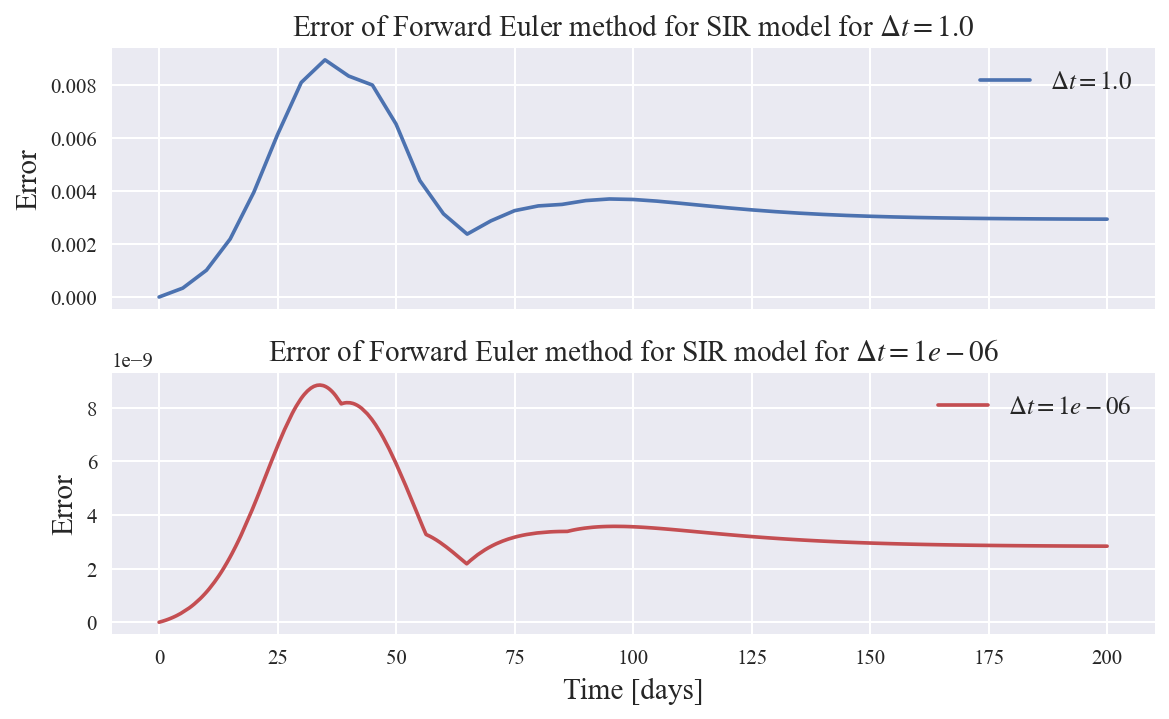

In [37]:
# Err plot as a functio of time for the two extreme dt values

# Use sns colors
n_colors = 4
colors = sns.color_palette("deep", n_colors=n_colors)
colors = [colors[0], colors[-1]]

fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
for i, dt in enumerate([high_dt, low_dt]):
    ax[i].plot(t_save[i], er_save[i], label=r"$\Delta t = {}$".format(dt), color=colors[i])
    ax[i].set_title(r"Error of Forward Euler method for SIR model for $\Delta t = {}$".format(dt), fontsize=14)
    ax[i].set_ylabel("Error", fontsize=14)

ax[1].set_xlabel("Time [days]", fontsize=14)
for axi in ax.flatten():
    axi.legend(fontsize=12)

plt.tight_layout()